In [ ]:
import fine_tunned_bert

In [ ]:
import pandas as pd
import tensorflow as tf

import matplotlib.pyplot as plt
%matplotlib inline

import scikitplot as skplt
from tensorflow.keras import metrics 
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [ ]:
bert_model_name='small_bert/bert_en_uncased_L-4_H-512_A-8'

In [ ]:
df = pd.read_csv('./data/authority_dataset.csv')
df

,ad,auth
0,north korea officially has no corona cases how...,1
1,it seems difficult to stand for something one ...,0
2,senator bernie sanders held a rally with randy...,1
3,life gets busy—don’t wait to send back your ba...,0
4,some issues feel impossible to compromise on b...,1
...,...,...
49661,a recent poll shows sherrod with just a one po...,0
49662,today’s donor goal ⃣ ⃣ ⃣ our endofquarter dead...,0
49663,you’ve been selected after a year of chaos hat...,1
49664,after receiving the corona vaccine a video tha...,0


In [ ]:
# build test and training datasets 
cleaned_train, cleaned_test, y_train, y_test = train_test_split(df['ad'], df['auth'] , test_size = 0.2, random_state = 42 , shuffle = True)
cleaned_train, cleaned_val, y_train, y_val = train_test_split(cleaned_train, y_train,  test_size=0.25, random_state= 42, shuffle = True)

In [ ]:
train_data = tf.data.Dataset.from_tensor_slices(  (cleaned_train,y_train) ).batch(32)
val_data = tf.data.Dataset.from_tensor_slices( (cleaned_val,y_val) ).batch(32)
test_data = tf.data.Dataset.from_tensor_slices( (cleaned_test,y_test) ).batch(32)

# create the fine_tunned_model
bert_model = fine_tunned_bert.create_fine_tunned_bert(train_data,bert_model_name=bert_model_name)

# training the model
history = bert_model.fit(x=train_data,epochs =5,validation_data = val_data,verbose=False)

# evaluation 
scores = bert_model.evaluate(test_data)
print("-----------------------------------------")
predictions=bert_model.predict(cleaned_test)
results = (predictions>0.5)*1
tn, fp, fn, tp = confusion_matrix(y_test,results).ravel()
print("Fold cofusion matrix")
print((tn, fp, fn, tp))
print("-----------------------------------------")


311/311 [==============================] - 30s 97ms/step - loss: 0.0837 - accuracy: 0.9823 - precision: 0.9868 - recall: 0.9777 - auc: 0.9923
-----------------------------------------
311/311 [==============================] - 29s 91ms/step
Fold cofusion matrix
(4893, 65, 111, 4865)
-----------------------------------------


In [ ]:
# model evaluation 
scores = bert_model.evaluate(test_data)
print("Accuracy: %.2f%%" % (scores[1]*100))

311/311 [==============================] - 30s 97ms/step - loss: 0.0837 - accuracy: 0.9823 - precision: 0.9868 - recall: 0.9777 - auc: 0.9923
Accuracy: 98.23%


              precision    recall  f1-score   support

no-authority       0.98      0.99      0.98      4958
   authority       0.99      0.98      0.98      4976

    accuracy                           0.98      9934
   macro avg       0.98      0.98      0.98      9934
weighted avg       0.98      0.98      0.98      9934



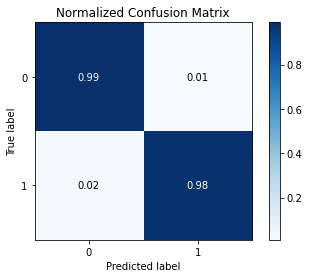

In [ ]:
print(metrics.classification_report(y_test, results, target_names=[ 'no-authority', 'authority']))


skplt.metrics.plot_confusion_matrix(y_test, results , normalize=True)
plt.show()

In [ ]:
save = pd.read_csv('./data/sample_auth.csv')

save=save.sample(frac=1)

test_data = tf.data.Dataset.from_tensor_slices( (save['ad'],save['authority']) ).batch(32)
# model evaluation 
scores = bert_model.evaluate(test_data)
print("Accuracy: %.2f%%" % (scores[1]*100))


7/7 [==============================] - 1s 171ms/step - loss: 2.0044 - accuracy: 0.7600 - precision: 0.7778 - recall: 0.7143 - auc: 0.7747
Accuracy: 76.00%


7/7 [==============================] - 1s 103ms/step
confusion matrix:
[[82 20]
 [28 70]]



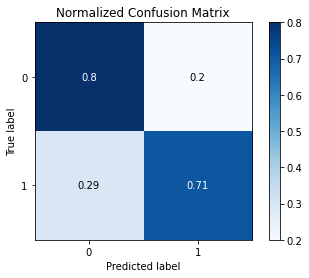

In [ ]:
from sklearn import metrics
pred_ =  bert_model.predict(save['ad'])
save['predicted'] = [1 if prob > 0.5 else 0 for prob in pred_]

print("confusion matrix:")
print(metrics.confusion_matrix(save['authority'], save['predicted']))
print()

skplt.metrics.plot_confusion_matrix(save['authority'], save['predicted'], normalize=True)
plt.show()

In [ ]:
print(metrics.classification_report(save['authority'], save['predicted'], target_names=[ 'no-authority', 'authority']))

              precision    recall  f1-score   support

no-authority       0.75      0.80      0.77       102
   authority       0.78      0.71      0.74        98

    accuracy                           0.76       200
   macro avg       0.76      0.76      0.76       200
weighted avg       0.76      0.76      0.76       200

